In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
csv_path = "../data/correct_cols.tsv"

In [4]:
def add_missing_tabs_in_file(source_path: str, target_path: str) -> None:
    with open(source_path, "r") as source, open(target_path, "w") as target:
        headers = "file\tyear\tid\tscore\tsen1\tsen2\tinfo1\tinfo2\n"
        target.write(headers)
        for line in source:
            if line.count("\t") == 5:
                line = line.strip()
                line += "\t\t\n"
            target.write(line)
add_missing_tabs_in_file("../data/sts-other.tsv", csv_path)

In [5]:
df = pd.read_csv(csv_path, sep="\t")

In [6]:
from utx import summarise
print(summarise(df))

Summary statistics:
Dataframe dimensions: 3814x8
file - object
	Examples:
		surprise.OnWN
		surprise.OnWN
		surprise.OnWN
	Unique objects:
		7
	Contains NaN: False
year - object
	Examples:
		2012test
		2012test
		2012test
	Unique objects:
		5
	Contains NaN: False
id - int64
	Range( 0.00,  1981.00)
	Quantiles: 0.25:  161.00 | 0.5:  359.50 | 0.75:  574.00
	Mean:  419.43
	Contains NaN: False
score - float64
	Range( 0.00,  5.00)
	Quantiles: 0.25:  1.00 | 0.5:  3.20 | 0.75:  4.20
	Mean:  2.73
	Contains NaN: False
sen1 - object
	Examples:
		render one language in another language
		nations unified by shared interests, history or institutions
		convert into absorbable substances, (as if) with heat or chemical process
	Unique objects:
		3142
	Contains NaN: False
sen2 - object
	Examples:
		restate (words) from one language into another language.
		a group of nations having common interests.
		soften or disintegrate by means of chemical action, heat, or moisture.
	Unique objects:
		2936
	Contain

In [7]:
df["year"] = df.year.str.replace("test", "")
df = (df
      .astype({"file": "category", "year": "int16"})
      .drop("id", axis=1)
)
df.to_feather("../data/preprocessed.feather")

In [8]:
print(summarise(df))

Summary statistics:
Dataframe dimensions: 3814x7
file - category
	Examples:
		surprise.OnWN
		surprise.OnWN
		surprise.OnWN
	Unique objects:
		7
	Contains NaN: False
year - int16
	Examples:
		2012
		2012
		2012
	Unique objects:
		5
	Contains NaN: False
score - float64
	Range( 0.00,  5.00)
	Quantiles: 0.25:  1.00 | 0.5:  3.20 | 0.75:  4.20
	Mean:  2.73
	Contains NaN: False
sen1 - object
	Examples:
		render one language in another language
		nations unified by shared interests, history or institutions
		convert into absorbable substances, (as if) with heat or chemical process
	Unique objects:
		3142
	Contains NaN: False
sen2 - object
	Examples:
		restate (words) from one language into another language.
		a group of nations having common interests.
		soften or disintegrate by means of chemical action, heat, or moisture.
	Unique objects:
		2936
	Contains NaN: False
info1 - object
	Examples:
		nan
		nan
		nan
	Unique objects:
		232
	Contains NaN: True
info2 - object
	Examples:
		nan
		nan
	

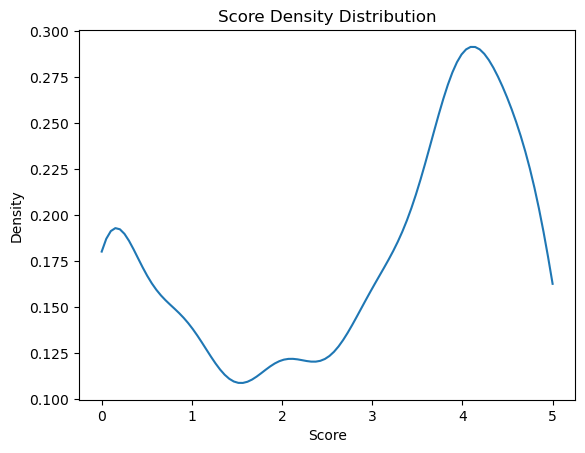

utx.plot

In [9]:
from utx import plot
from scipy.stats import gaussian_kde

(plot(0, 5, 100)
 .function(gaussian_kde(df.score))
 .labels("Score Density Distribution", "Score", "Density")
 .show()
)

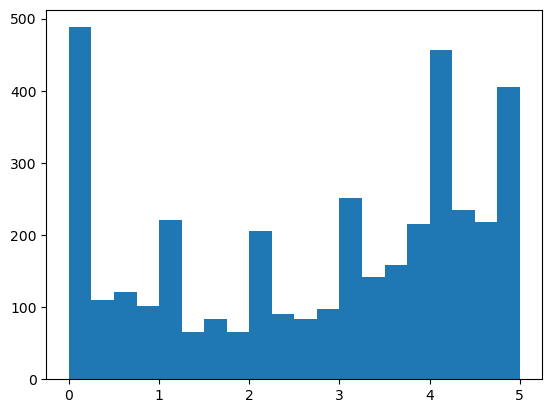

In [10]:
plt.hist(df.score, bins=20)
plt.show()

In [11]:
df.score /= 5

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nicolai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/nicolai/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


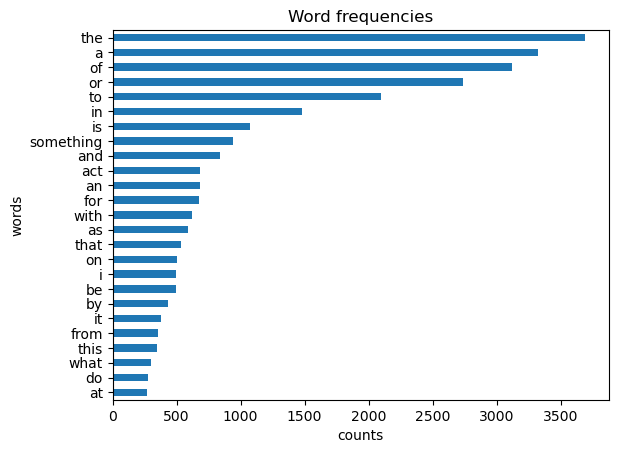

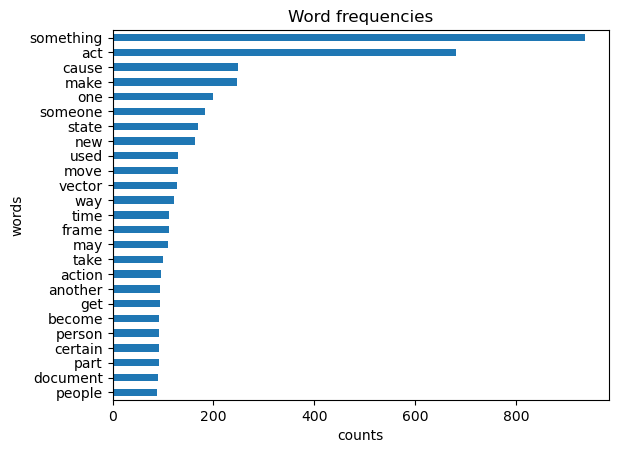

In [12]:
from typing import List
from collections import Counter
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

def plot_top_k_word_freq(sentences: List[str], k: int, remove_stopwords: bool = False):
    eng_stopwords = stopwords.words("english")
    # count each word
    cnt = Counter()
    for sentence in sentences:
        for word in nltk.word_tokenize(sentence):
            if word.isalpha() and (not remove_stopwords or word.lower() not in eng_stopwords):
                cnt[word.lower()] += 1

    # plot words frequencies
    (
        pd.DataFrame(cnt.most_common(k), columns=["words", "counts"])
        .sort_values(by="counts")
        .plot.barh(x="words", y="counts", legend=None)
    )
    plt.title("Word frequencies")
    plt.xlabel("counts")
    plt.show()

all_sentences = pd.concat([df.sen1, df.sen2]).to_list()

plot_top_k_word_freq(all_sentences, k=25)
plot_top_k_word_freq(all_sentences, k=25, remove_stopwords=True)